In [23]:
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import PlayerCareerStats
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
players = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/players.json').text)

teams = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json').text)

In [3]:
def get_player_id(first, last):
    for player in players:
        if player['firstName'] == first and player['lastName'] == last:
            return player['playerId']
    return -1

In [4]:
get_player_id('Stephen', 'Curry')

201939

In [5]:
def get_team_id(team_name):
    for team in teams:
        if team['teamName'] == team_name:
            return team['teamId']
    return -1

In [17]:
get_team_id('New York Knicks')

1610612752

In [7]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = get_team_id('Golden State Warriors'),
            player_id = get_player_id('Stephen', 'Curry'),
            context_measure_simple = 'PTS',
            season_nullable = '2015-16',
            season_type_all_star = 'Regular Season')

In [8]:
shot_data = json.loads(shot_json.get_json())

In [9]:
relevant_data = shot_data['resultSets'][0]
headers = relevant_data['headers']
rows = relevant_data['rowSet']

# Create pandas DataFrame
curry_data = pd.DataFrame(rows)
curry_data.columns = headers

In [29]:
def get_stats(player_id,season):
    df = PlayerCareerStats(player_id='201939').get_data_frames()[0]
    df[season]

PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  \
0      201939   2009-10        00  1610612744               GSW        22.0   
1      201939   2010-11        00  1610612744               GSW        23.0   
2      201939   2011-12        00  1610612744               GSW        24.0   
3      201939   2012-13        00  1610612744               GSW        25.0   
4      201939   2013-14        00  1610612744               GSW        26.0   
5      201939   2014-15        00  1610612744               GSW        27.0   
6      201939   2015-16        00  1610612744               GSW        28.0   
7      201939   2016-17        00  1610612744               GSW        29.0   
8      201939   2017-18        00  1610612744               GSW        30.0   
9      201939   2018-19        00  1610612744               GSW        31.0   
10     201939   2019-20        00  1610612744               GSW        32.0   
11     201939   2020-21        00  1610612744               GSW        33.0   
12     201939   2021-22        00  1610612744               GSW        34.0   

    GP  GS     MIN  FGM  ...  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV  \
0   80  77  2896.0  528  ...   0.885    48   308  356  472  152   19  243   
1   74  74  2489.0  505  ...   0.934    52   234  286  432  109   20  226   
2   26  23   732.0  145  ...   0.809    15    73   88  138   39    8   65   
3   78  78  2983.0  626  ...   0.900    59   255  314  539  126   12  240   
4   78  78  2846.0  652  ...   0.885    46   288  334  666  128   14  294   
5   80  80  2613.0  653  ...   0.914    56   285  341  619  163   16  249   
6   79  79  2700.0  805  ...   0.908    68   362  430  527  169   15  262   
7   79  79  2639.0  675  ...   0.898    61   292  353  524  142   17  239   
8   51  51  1631.0  428  ...   0.921    36   225  261  310   80    8  153   
9   69  69  2331.0  632  ...   0.916    45   324  369  361   92   25  192   
10   5   5   139.0   33  ...   1.000     4    22   26   33    5    2   16   
11  63  63  2152.0  658  ...   0.916    29   316  345  363   77    8  213   
12  64  64  2211.0  535  ...   0.923    34   301  335  404   85   23  206   

     PF   PTS  
0   252  1399  
1   233  1373  
2    62   383  
3   198  1786  
4   194  1873  
5   158  1900  
6   161  2375  
7   183  1999  
8   114  1346  
9   166  1881  
10   11   104  
11  119  2015  
12  130  1630  

[13 rows x 27 columns]

In [31]:
df = PlayerCareerStats(player_id='201939').get_data_frames()[0]

In [50]:
df.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [156]:
year_stats = df[df['SEASON_ID'] == '2021-22']
G1P = year_stats['GP']

In [180]:
sd = year_stats[['GP','PTS','AST','REB']]
sd['PTSg'] = sd['PTS']/sd['GP']
sd['ASTg'] = sd['AST']/sd['GP']
sd['REBg'] = sd['REB']/sd['GP']
sd.round(2)

<ipython-input-180-5ebf2a708527>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd['PTSg'] = sd['PTS']/sd['GP']
<ipython-input-180-5ebf2a708527>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd['ASTg'] = sd['AST']/sd['GP']
<ipython-input-180-5ebf2a708527>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

GP   PTS  AST  REB   PTSg  ASTg  REBg
12  64  1630  404  335  25.47  6.31  5.23

In [10]:
def create_court(ax, color):
    
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    
    return ax

In [11]:
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2

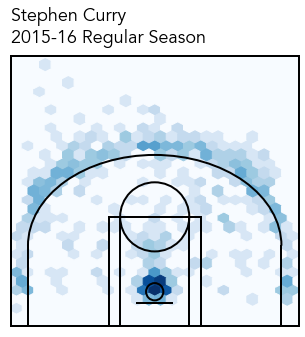

In [12]:
# Create figure and axes
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])

# Draw court
ax = create_court(ax, 'black')

# Plot hexbin of shots
ax.hexbin(curry_data['LOC_X'], curry_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')

# Annotate player name and season
ax.text(0, 1.05, 'Stephen Curry\n2015-16 Regular Season', transform=ax.transAxes, ha='left', va='baseline')

# Save and show figure
plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()